In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#stations, stations_hr, city_day, city_hour, station_day = pd.DataFrame()
filepaths = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        fpath = os.path.join(dirname, filename)
        print(fpath)
        filepaths.append(fpath)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


In [2]:
filepaths

['/kaggle/input/air-quality-data-in-india/stations.csv',
 '/kaggle/input/air-quality-data-in-india/station_hour.csv',
 '/kaggle/input/air-quality-data-in-india/city_day.csv',
 '/kaggle/input/air-quality-data-in-india/city_hour.csv',
 '/kaggle/input/air-quality-data-in-india/station_day.csv']

Reading all the datasets from the imported CSVs

Stations CSV:

In [3]:
stations = pd.read_csv(filepaths[0])
print(stations.shape)
stations.head(5)

(230, 5)


,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


Station-Hour CSV:

In [4]:
station_hr = pd.read_csv(filepaths[1])
print(station_hr.shape)
station_hr.head(5)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2589083, 16)


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


City-Day CSV:

In [5]:
city_day = pd.read_csv(filepaths[2])
print(city_day.shape)
city_day.head(5)

(29531, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


City-Hour CSV:

In [6]:
city_hr = pd.read_csv(filepaths[3])
print(city_hr.shape)
city_hr.head(5)

(707875, 16)


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


Station-day CSV:

In [7]:
station_day = pd.read_csv(filepaths[4])
print(station_day.shape)
station_day.head(5)

(108035, 16)


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


**Data Exploration - Mumbai Stations**

Since datasets contain data from multiple cities of India, filtering the Mumbai data as focus of work is around Mumbai atm

In [8]:
#stations['City'].nunique()
stations[stations['City'] == 'Mumbai'].value_counts

<bound method DataFrame.value_counts of     StationId                                        StationName    City  \
139     MH005                              Bandra, Mumbai - MPCB  Mumbai   
140     MH006                       Borivali East, Mumbai - MPCB  Mumbai   
141     MH007  Chhatrapati Shivaji Intl. Airport (T2), Mumbai...  Mumbai   
142     MH008                              Colaba, Mumbai - MPCB  Mumbai   
143     MH009                               Kurla, Mumbai - MPCB  Mumbai   
144     MH010                               Powai, Mumbai - MPCB  Mumbai   
145     MH011                                Sion, Mumbai - MPCB  Mumbai   
146     MH012                          Vasai West, Mumbai - MPCB  Mumbai   
147     MH013                     Vile Parle West, Mumbai - MPCB  Mumbai   
148     MH014                               Worli, Mumbai - MPCB  Mumbai   

           State  Status  
139  Maharashtra  Active  
140  Maharashtra  Active  
141  Maharashtra  Active  
142  Maharashtr

Extract all station Ids of stations located in Mumbai from stations csv

In [9]:
mumbai_stations = stations[stations['City'] == 'Mumbai']
list_mb_stations = list(mumbai_stations['StationId'])
print(list_mb_stations)

['MH005', 'MH006', 'MH007', 'MH008', 'MH009', 'MH010', 'MH011', 'MH012', 'MH013', 'MH014']


Filter data of all Mumbai substations from stations-day dataset 

In [10]:
mumbai_stations_day = station_day.loc[station_day['StationId'].apply(lambda x: x in list_mb_stations)]
print(mumbai_stations_day.shape)
print(mumbai_stations_day.head(5))

(5504, 16)
      StationId        Date  PM2.5  PM10  NO  NO2    NOx  NH3   CO  SO2  O3  \
70838     MH005  2015-01-01    NaN   NaN NaN  NaN  27.38  NaN  0.0  NaN NaN   
70839     MH005  2015-01-02    NaN   NaN NaN  NaN  26.20  NaN  0.0  NaN NaN   
70840     MH005  2015-01-03    NaN   NaN NaN  NaN  26.04  NaN  0.0  NaN NaN   
70841     MH005  2015-01-04    NaN   NaN NaN  NaN  25.97  NaN  0.0  NaN NaN   
70842     MH005  2015-01-05    NaN   NaN NaN  NaN  25.18  NaN  0.0  NaN NaN   

       Benzene  Toluene  Xylene  AQI AQI_Bucket  
70838      0.0      0.0     0.0  NaN        NaN  
70839      0.0      0.0     0.0  NaN        NaN  
70840      0.0      0.0     0.0  NaN        NaN  
70841      0.0      0.0     0.0  NaN        NaN  
70842      0.0      0.0     0.0  NaN        NaN  


Date range of the stations-day dataset

In [11]:
begin_date = list(mumbai_stations_day['Date'])[0]
end_date = list(mumbai_stations_day['Date'])[-1]
print(f'Data date range: {begin_date} to {end_date}')

Data date range: 2015-01-01 to 2020-07-01


Datatypes check and casting

In [12]:
mumbai_stations_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5504 entries, 70838 to 76341
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   5504 non-null   object 
 1   Date        5504 non-null   object 
 2   PM2.5       3878 non-null   float64
 3   PM10        3885 non-null   float64
 4   NO          3977 non-null   float64
 5   NO2         3972 non-null   float64
 6   NOx         4734 non-null   float64
 7   NH3         3252 non-null   float64
 8   CO          5231 non-null   float64
 9   SO2         3952 non-null   float64
 10  O3          3943 non-null   float64
 11  Benzene     4795 non-null   float64
 12  Toluene     1016 non-null   float64
 13  Xylene      1015 non-null   float64
 14  AQI         3872 non-null   float64
 15  AQI_Bucket  3872 non-null   object 
dtypes: float64(13), object(3)
memory usage: 731.0+ KB


In [13]:
mumbai_stations_day["Date"] = pd.to_datetime(mumbai_stations_day.Date)
print(mumbai_stations_day['Date'].dtypes)

datetime64[ns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
mumbai_stations_day['AQI_Bucket'] = mumbai_stations_day['AQI_Bucket'].astype('string')
print(mumbai_stations_day['AQI_Bucket'].dtypes)

string


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Missing Data**

Check the percentage of missing/empty/null data points in Mumbai stations-day dataset

In [15]:
print((mumbai_stations_day.isna().sum()/len(mumbai_stations_day) * 100.0))

StationId      0.000000
Date           0.000000
PM2.5         29.542151
PM10          29.414971
NO            27.743459
NO2           27.834302
NOx           13.989826
NH3           40.915698
CO             4.960029
SO2           28.197674
O3            28.361192
Benzene       12.881541
Toluene       81.540698
Xylene        81.558866
AQI           29.651163
AQI_Bucket    29.651163
dtype: float64


In [16]:
print((mumbai_stations_day.isnull().sum()/len(mumbai_stations_day) * 100.0))

StationId      0.000000
Date           0.000000
PM2.5         29.542151
PM10          29.414971
NO            27.743459
NO2           27.834302
NOx           13.989826
NH3           40.915698
CO             4.960029
SO2           28.197674
O3            28.361192
Benzene       12.881541
Toluene       81.540698
Xylene        81.558866
AQI           29.651163
AQI_Bucket    29.651163
dtype: float64


**Data Visualization**

Visualize to analyze the data of all Mumbai substations from Stations-day dataset 

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

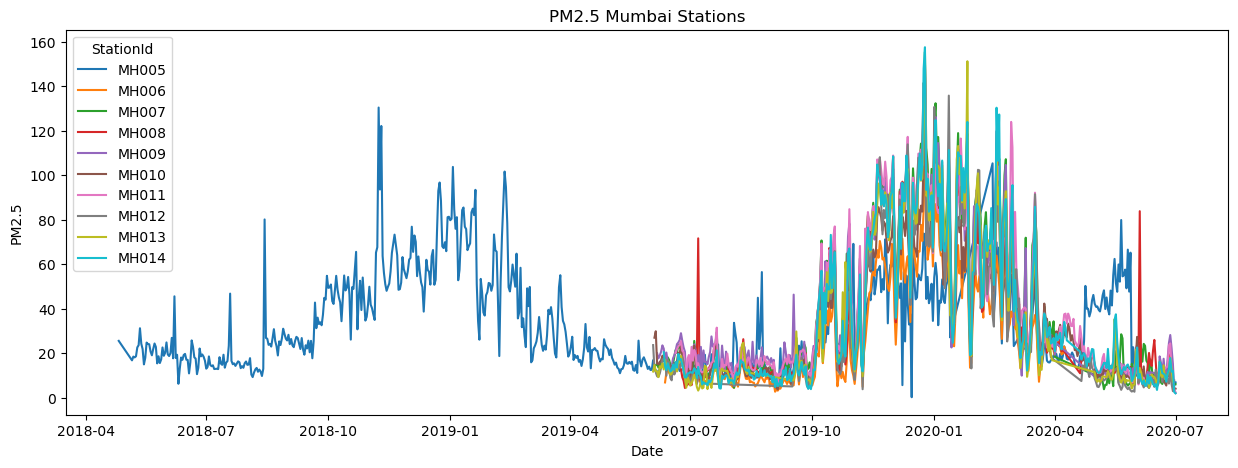

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.lineplot(x="Date", y="PM2.5", ax=ax, data=mumbai_stations_day,hue="StationId")
#graph.axhline(15, color='green')

graph.set(title="PM2.5 Mumbai Stations")

plt.show()

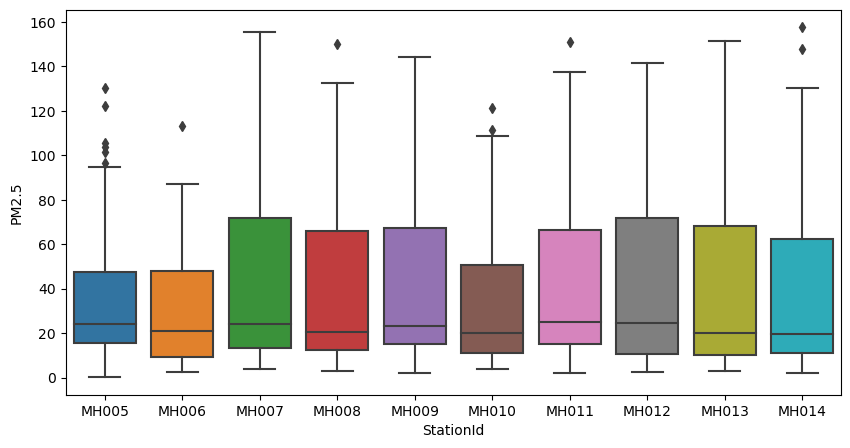

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
# box plot grouped by day
sns.boxplot(data=mumbai_stations_day, x="StationId", y="PM2.5")
plt.show()

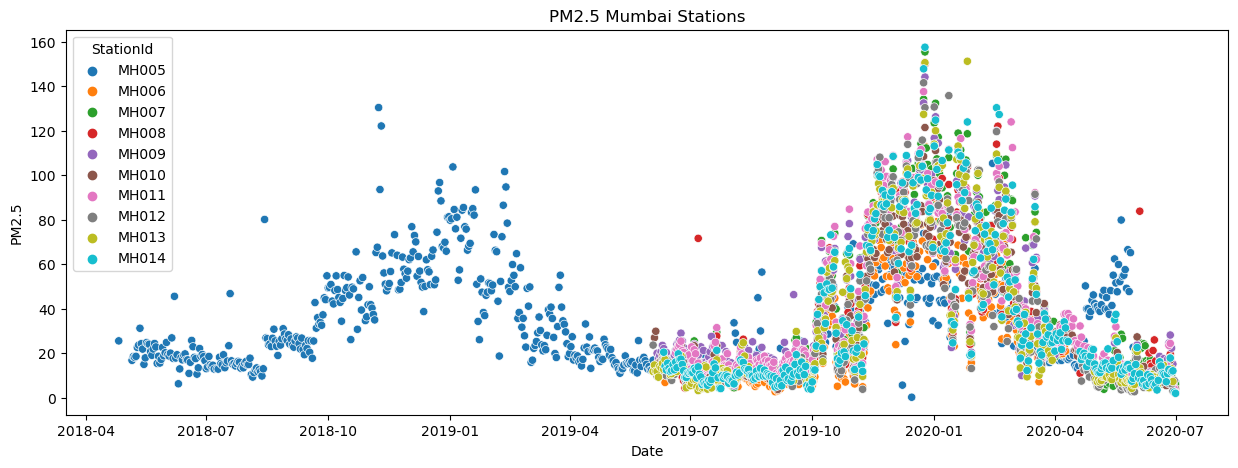

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.scatterplot(y="PM2.5", x="Date", data=mumbai_stations_day, hue="StationId")
#graph.axhline(15, color='green')

graph.set(title="PM2.5 Mumbai Stations")

plt.show()

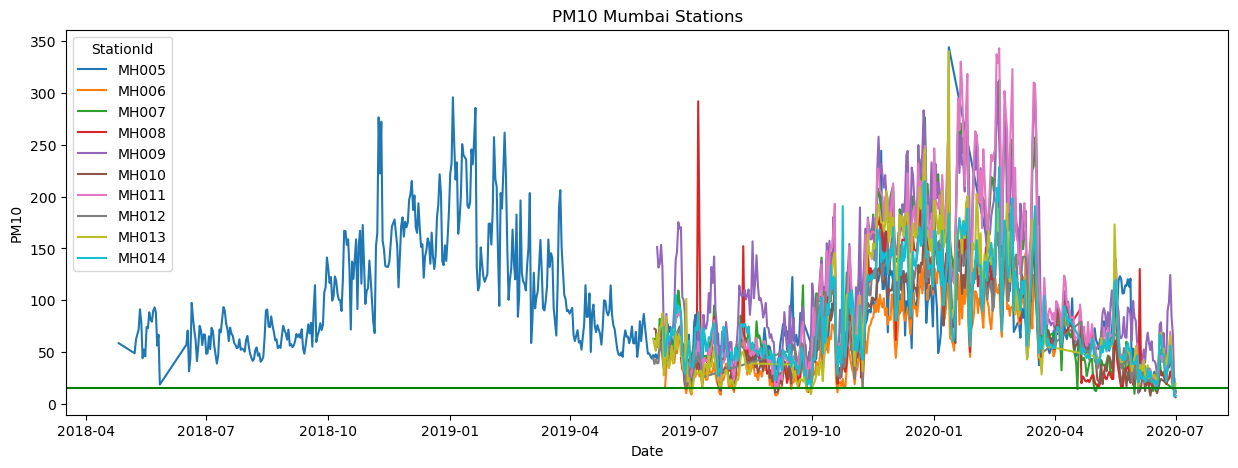

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.lineplot(x="Date", y="PM10", ax=ax, data=mumbai_stations_day,hue="StationId")
graph.axhline(15, color='green')

graph.set(title="PM10 Mumbai Stations")

plt.show()

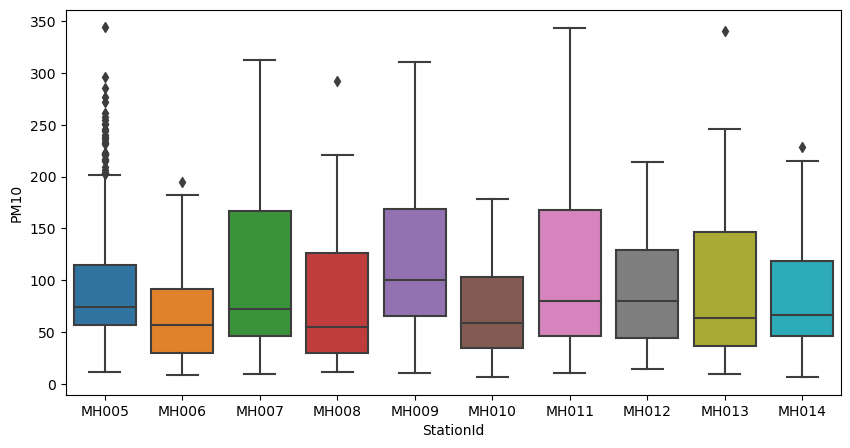

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
# box plot grouped by day
sns.boxplot(data=mumbai_stations_day, x="StationId", y="PM10")
plt.show()

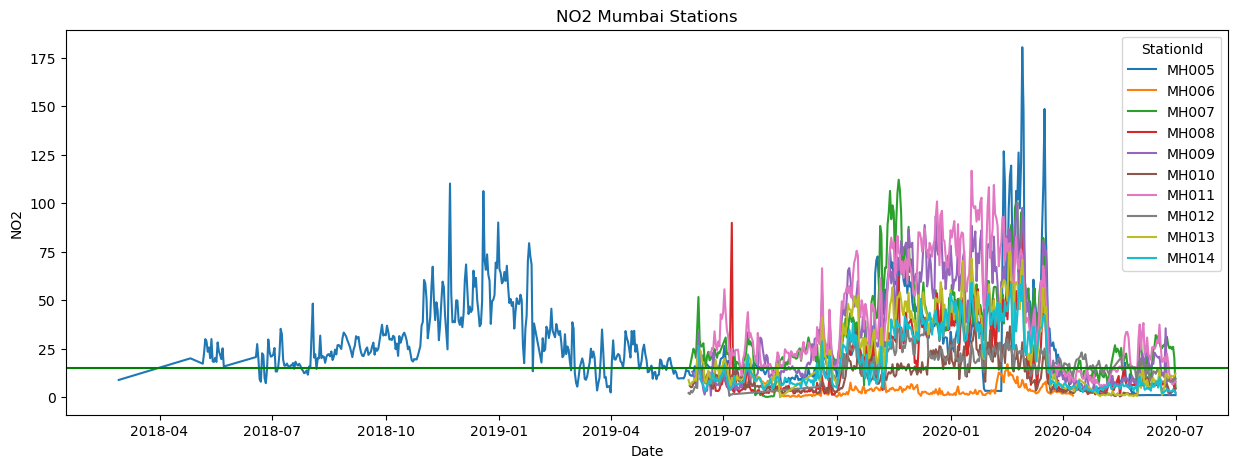

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.lineplot(x="Date", y="NO2", ax=ax, data=mumbai_stations_day,hue="StationId")
graph.axhline(15, color='green')

graph.set(title="NO2 Mumbai Stations")

plt.show()

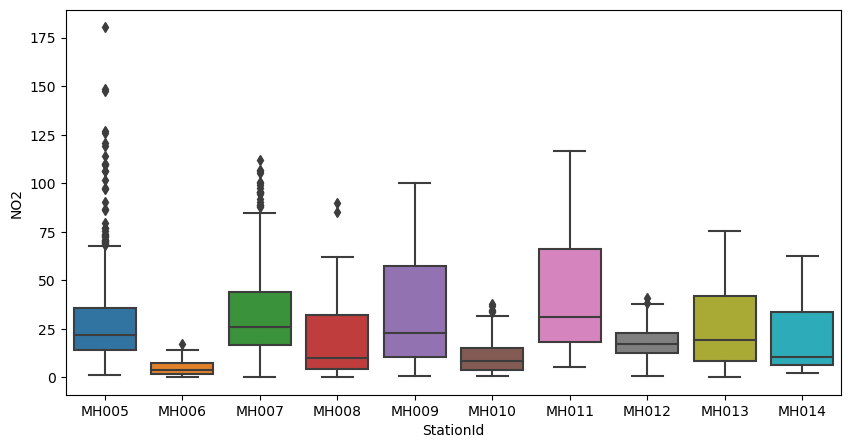

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
# box plot grouped by day
sns.boxplot(data=mumbai_stations_day, x="StationId", y="NO2")
plt.show()

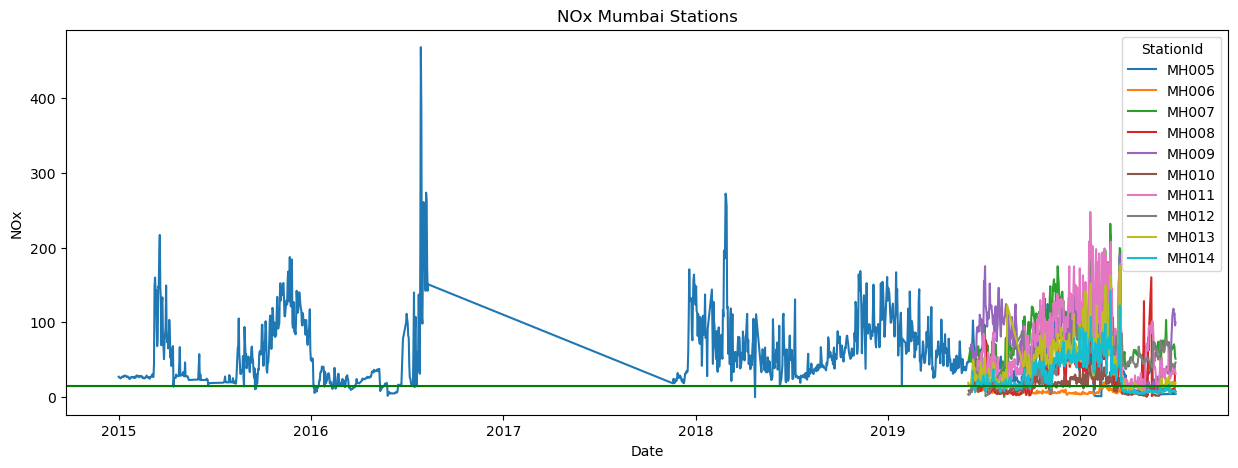

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.lineplot(x="Date", y="NOx", ax=ax, data=mumbai_stations_day,hue="StationId")
graph.axhline(15, color='green')

graph.set(title="NOx Mumbai Stations")

plt.show()

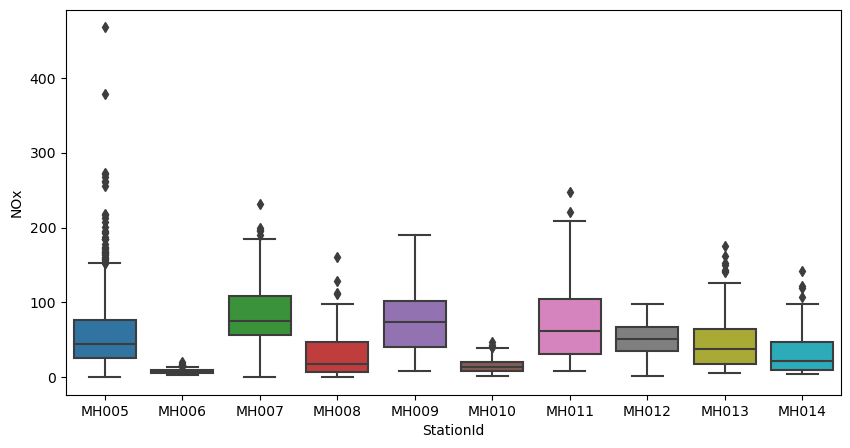

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
# box plot grouped by day
sns.boxplot(data=mumbai_stations_day, x="StationId", y="NOx")
plt.show()

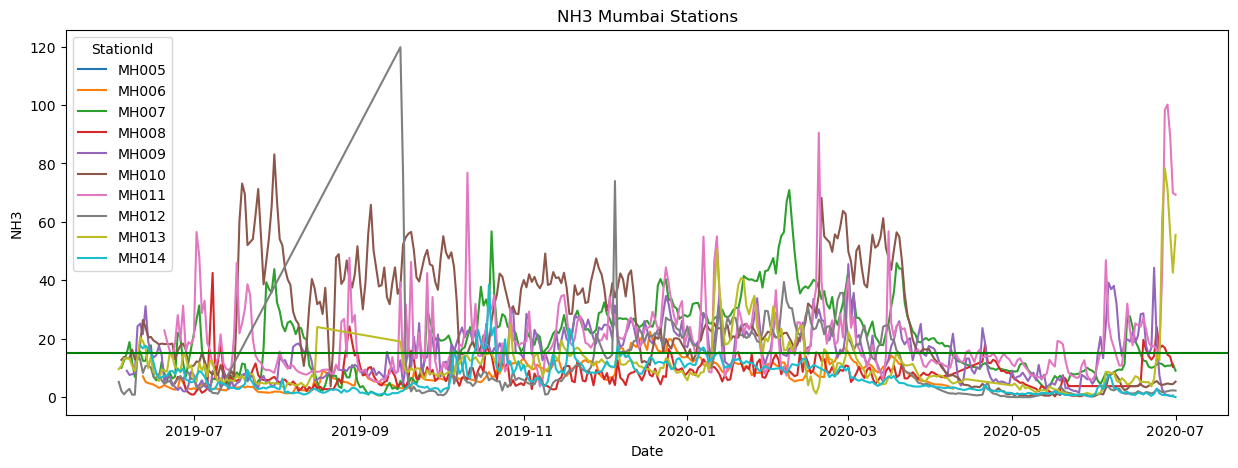

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.lineplot(x="Date", y="NH3", ax=ax, data=mumbai_stations_day,hue="StationId")
graph.axhline(15, color='green')

graph.set(title="NH3 Mumbai Stations")

plt.show()

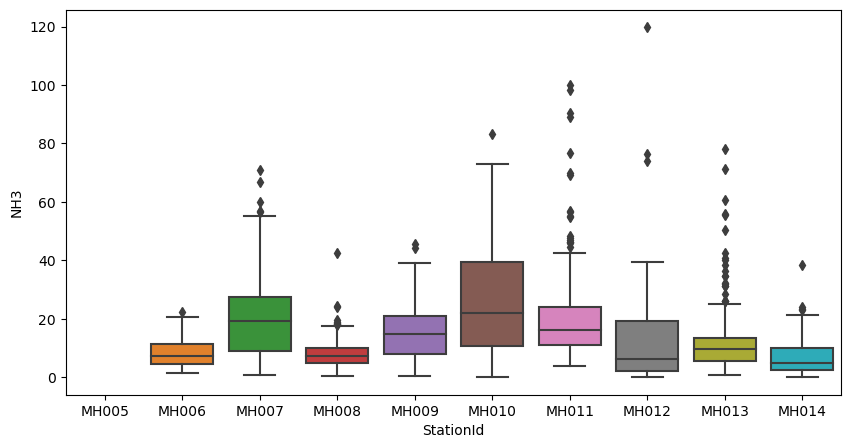

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
# box plot grouped by day
sns.boxplot(data=mumbai_stations_day, x="StationId", y="NH3")
plt.show()

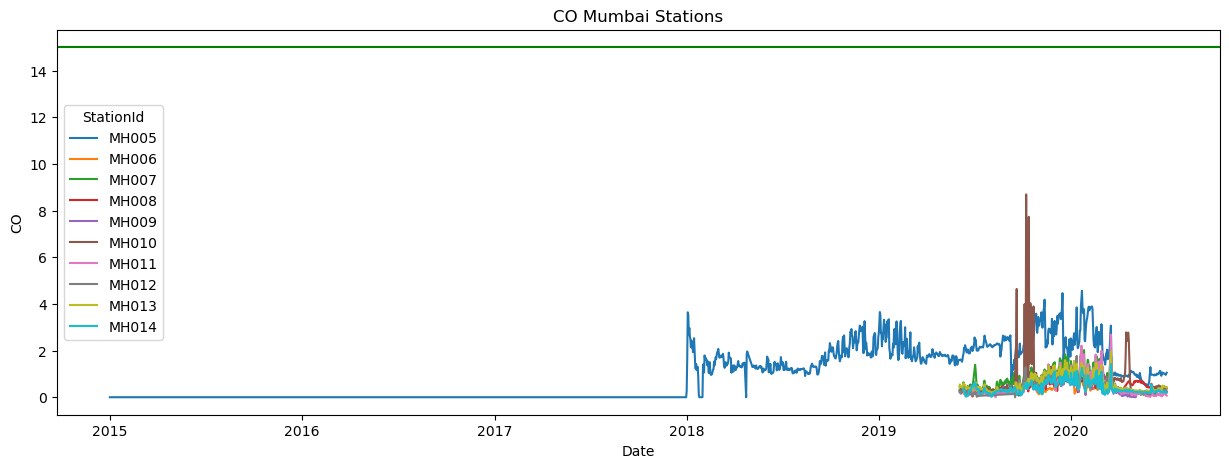

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.lineplot(x="Date", y="CO", ax=ax, data=mumbai_stations_day,hue="StationId")
graph.axhline(15, color='green')

graph.set(title="CO Mumbai Stations")

plt.show()

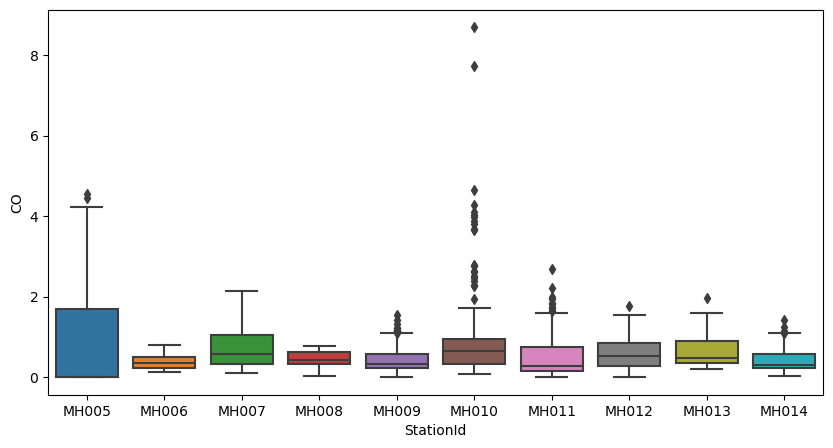

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
# box plot grouped by day
sns.boxplot(data=mumbai_stations_day, x="StationId", y="CO")
plt.show()

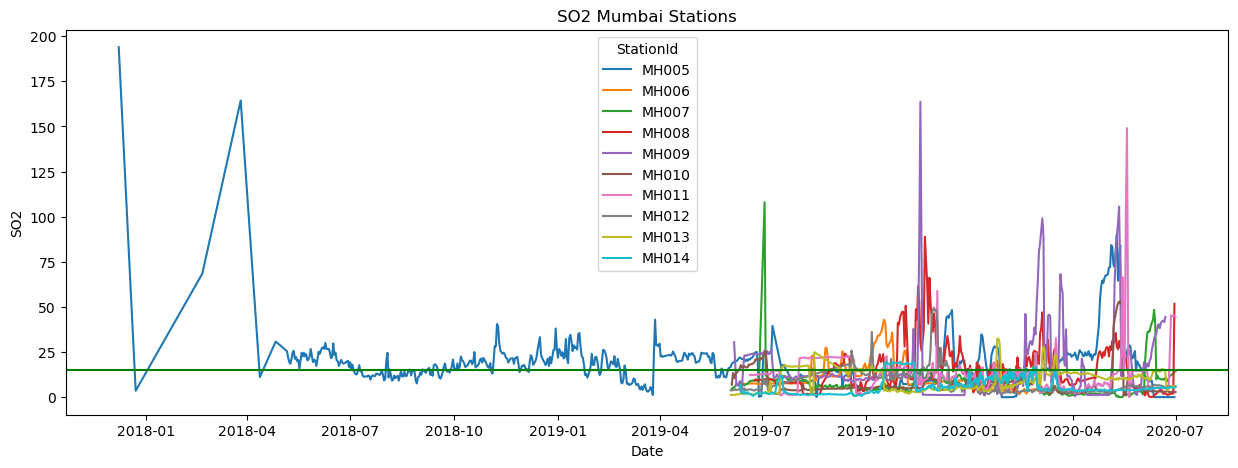

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.lineplot(x="Date", y="SO2", ax=ax, data=mumbai_stations_day,hue="StationId")
graph.axhline(15, color='green')

graph.set(title="SO2 Mumbai Stations")

plt.show()

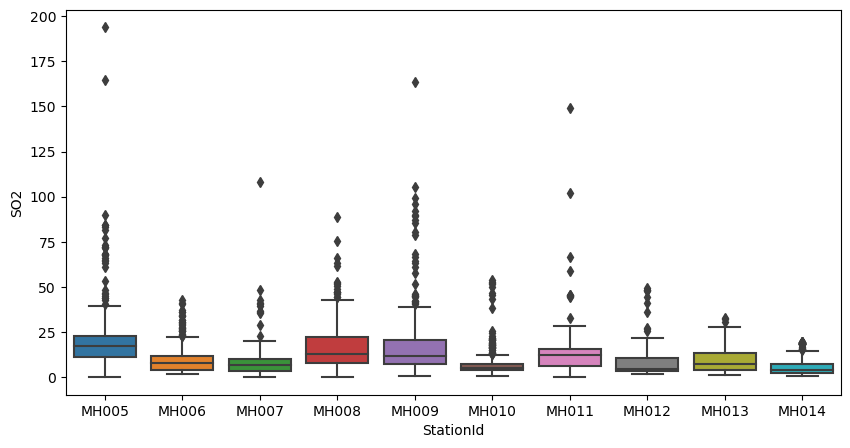

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
# box plot grouped by day
sns.boxplot(data=mumbai_stations_day, x="StationId", y="SO2")
plt.show()

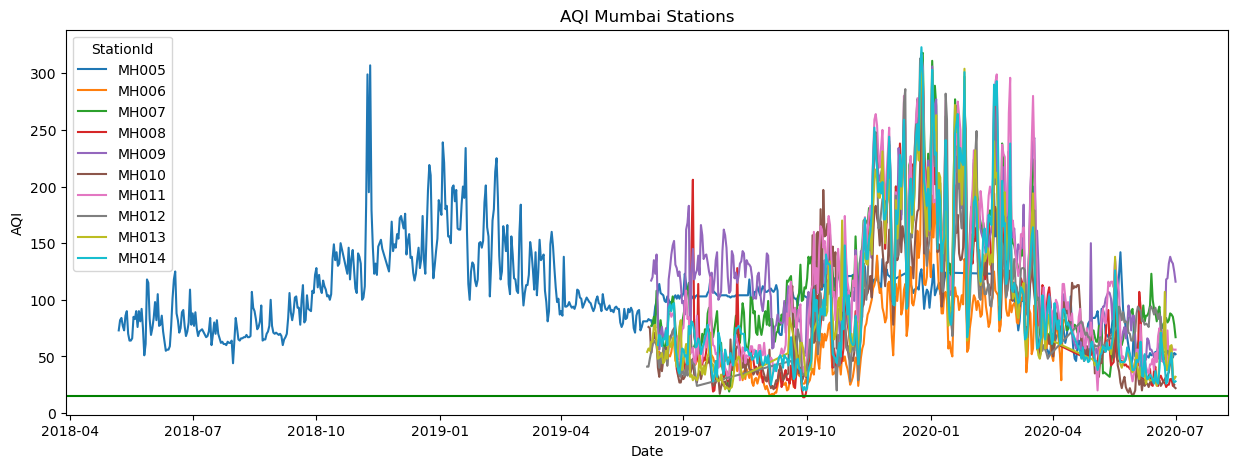

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
 
# drawing the plot
# Plot the responses for different events and regions
graph = sns.lineplot(x="Date", y="AQI", ax=ax, data=mumbai_stations_day,hue="StationId")
graph.axhline(15, color='green')

graph.set(title="AQI Mumbai Stations")

plt.show()

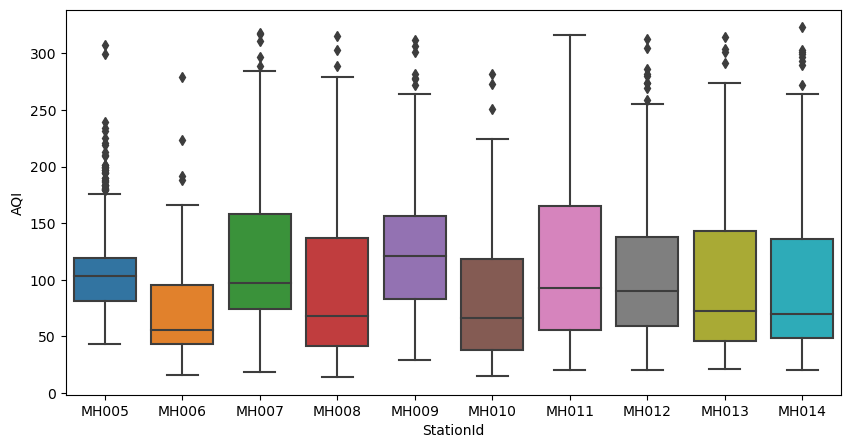

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
# box plot grouped by day
sns.boxplot(data=mumbai_stations_day, x="StationId", y="AQI")
plt.show()

In [35]:
mumbai_stations_day.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.873667,0.293336,0.654009,0.550904,0.314092,0.326901,0.059792,0.474419,0.341474,NaN,NaN,0.895557
PM10,0.873667,1.000000,0.456571,0.734202,0.700126,0.338726,0.371867,0.100989,0.457145,0.286591,NaN,NaN,0.877633
NO,0.293336,0.456571,1.000000,0.389500,0.846872,0.208192,0.279889,0.124002,-0.039383,0.095168,-0.289393,-0.389346,0.480816
NO2,0.654009,0.734202,0.389500,1.000000,0.802619,0.292445,0.355998,0.132310,0.426334,0.290133,1.000000,1.000000,0.691352
NOx,0.550904,0.700126,0.846872,0.802619,1.000000,0.292094,0.312954,0.142663,0.209478,0.195144,0.042290,0.028845,0.694517
NH3,0.314092,0.338726,0.208192,0.292445,0.292094,1.000000,0.346935,0.005448,0.031403,-0.019065,NaN,NaN,0.306151
CO,0.326901,0.371867,0.279889,0.355998,0.312954,0.346935,1.000000,0.141275,0.236411,0.030129,0.199842,0.146260,0.428154
SO2,0.059792,0.100989,0.124002,0.132310,0.142663,0.005448,0.141275,1.000000,0.092856,-0.021497,-0.287774,-0.287774,0.102112
O3,0.474419,0.457145,-0.039383,0.426334,0.209478,0.031403,0.236411,0.092856,1.000000,0.215581,0.005358,-0.002763,0.449936
Benzene,0.341474,0.286591,0.095168,0.290133,0.195144,-0.019065,0.030129,-0.021497,0.215581,1.000000,0.631691,0.539819,0.328578


<AxesSubplot:>

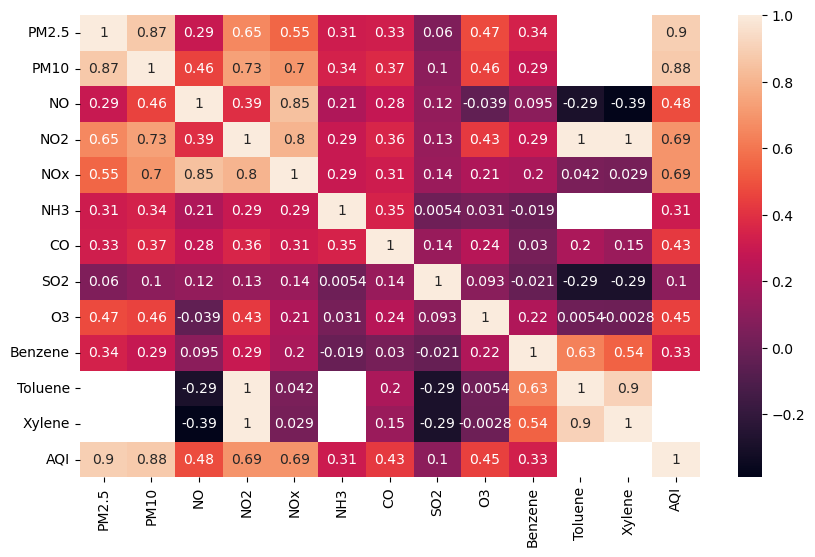

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(mumbai_stations_day.corr(), ax=ax, annot=True)

<AxesSubplot:>

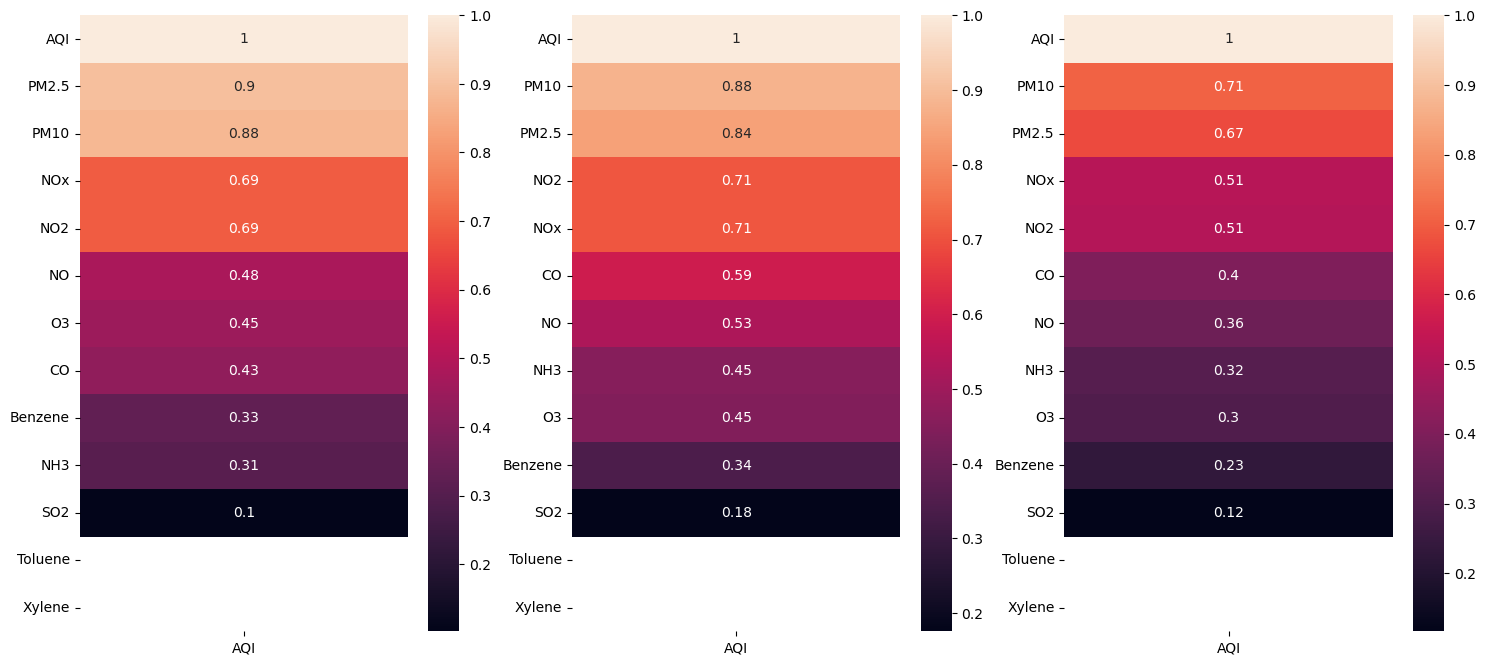

In [37]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))
#ax.set(xlabel="", ylabel="")

corr1 = mumbai_stations_day.corr('pearson')[['AQI']].sort_values(by='AQI', ascending=False)
corr2 = mumbai_stations_day.corr('spearman')[['AQI']].sort_values(by='AQI', ascending=False)
corr3 = mumbai_stations_day.corr('kendall')[['AQI']].sort_values(by='AQI', ascending=False)


sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

<AxesSubplot:xlabel='NOx', ylabel='Density'>

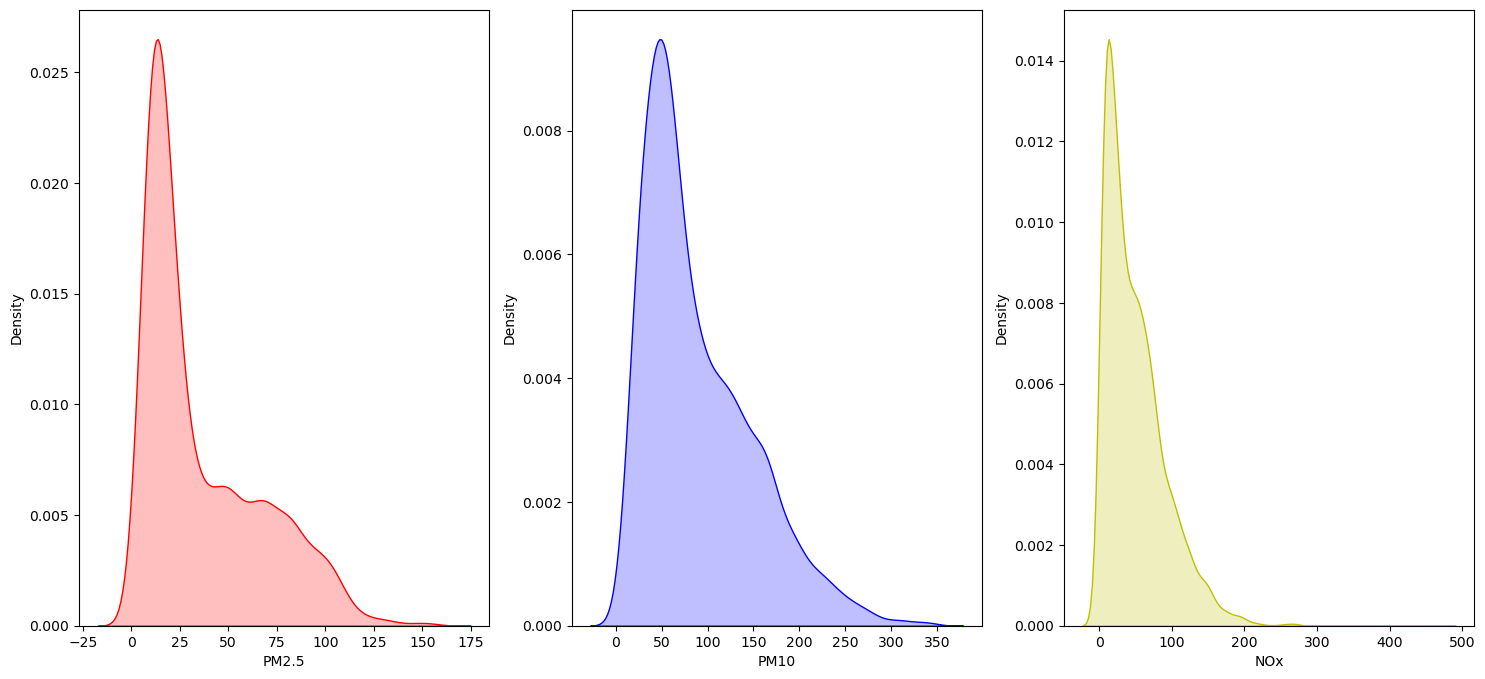

In [38]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))


sns.kdeplot(mumbai_stations_day['PM2.5'], color='r', fill=True, label='PM2.5', ax=ax[0])

sns.kdeplot(mumbai_stations_day['PM10'], color='b', fill=True, label='PM10', ax=ax[1])

sns.kdeplot(mumbai_stations_day['NOx'], color='y', fill=True, label='NOx', ax=ax[2])

#mumbai_stations_day['PM2.5'].plot(kind='kde', color='r', label='PM2.5')
#mumbai_stations_day['PM10'].plot(kind='kde', color='b', label='PM10')
#mumbai_stations_day['NOx'].plot(kind='kde', color='y', label='NOx')

<AxesSubplot:xlabel='CO', ylabel='Density'>

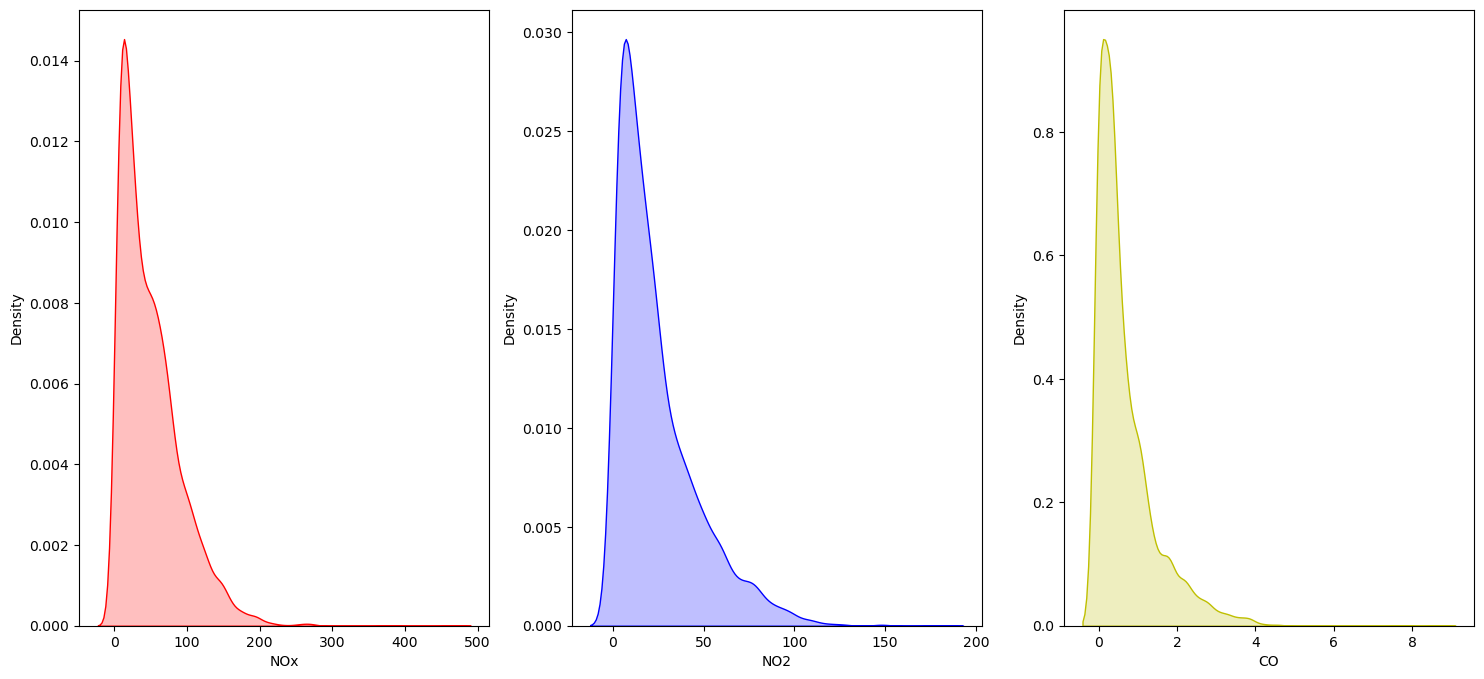

In [39]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))


sns.kdeplot(mumbai_stations_day['NOx'], color='r', fill=True, label='NOx', ax=ax[0])

sns.kdeplot(mumbai_stations_day['NO2'], color='b', fill=True, label='NO2', ax=ax[1])

sns.kdeplot(mumbai_stations_day['CO'], color='y', fill=True, label='CO', ax=ax[2])

#mumbai_stations_day['PM2.5'].plot(kind='kde', color='r', label='PM2.5')
#mumbai_stations_day['PM10'].plot(kind='kde', color='b', label='PM10')
#mumbai_stations_day['NOx'].plot(kind='kde', color='y', label='NOx')

**Visualizations Post Data Scaling**

In [40]:
from sklearn import preprocessing

In [41]:
mumbai_stations_day.columns.values

array(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI',
       'AQI_Bucket'], dtype=object)

In [43]:
r_scalar = preprocessing.RobustScaler()
df_r =  pd.DataFrame(r_scalar.fit_transform(mumbai_stations_day[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]), columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'])

<AxesSubplot:>

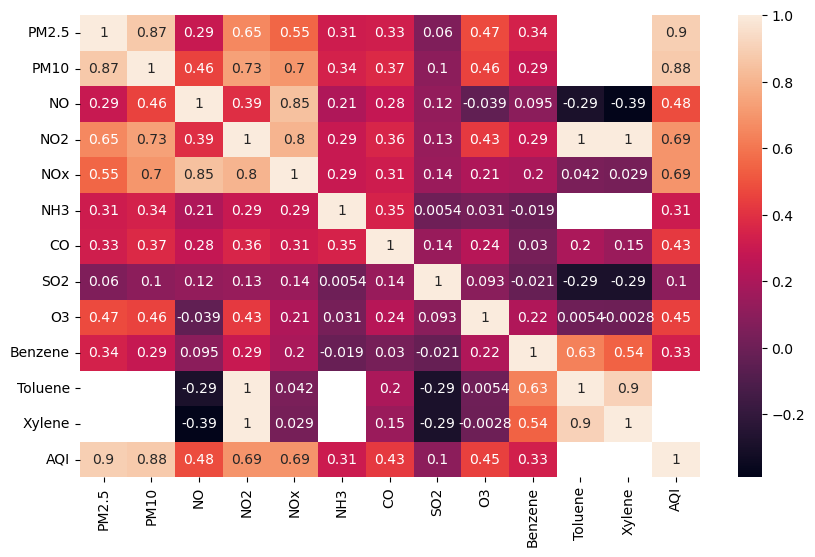

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_r.corr(), ax=ax, annot=True)

<AxesSubplot:xlabel='NOx', ylabel='Density'>

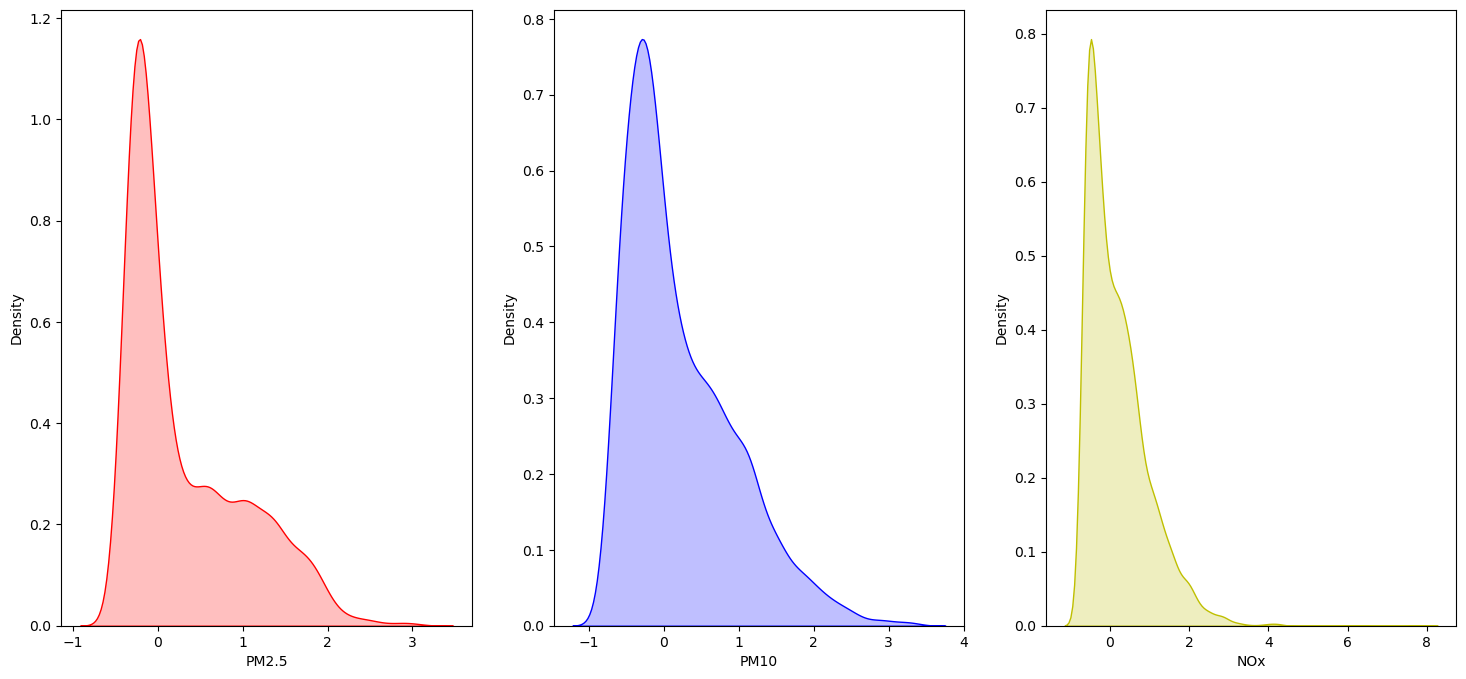

In [45]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))


sns.kdeplot(df_r['PM2.5'], color='r', fill=True, label='PM2.5', ax=ax[0])

sns.kdeplot(df_r['PM10'], color='b', fill=True, label='PM10', ax=ax[1])

sns.kdeplot(df_r['NOx'], color='y', fill=True, label='NOx', ax=ax[2])

#mumbai_stations_day['PM2.5'].plot(kind='kde', color='r', label='PM2.5')
#mumbai_stations_day['PM10'].plot(kind='kde', color='b', label='PM10')
#mumbai_stations_day['NOx'].plot(kind='kde', color='y', label='NOx')

<AxesSubplot:xlabel='CO', ylabel='Density'>

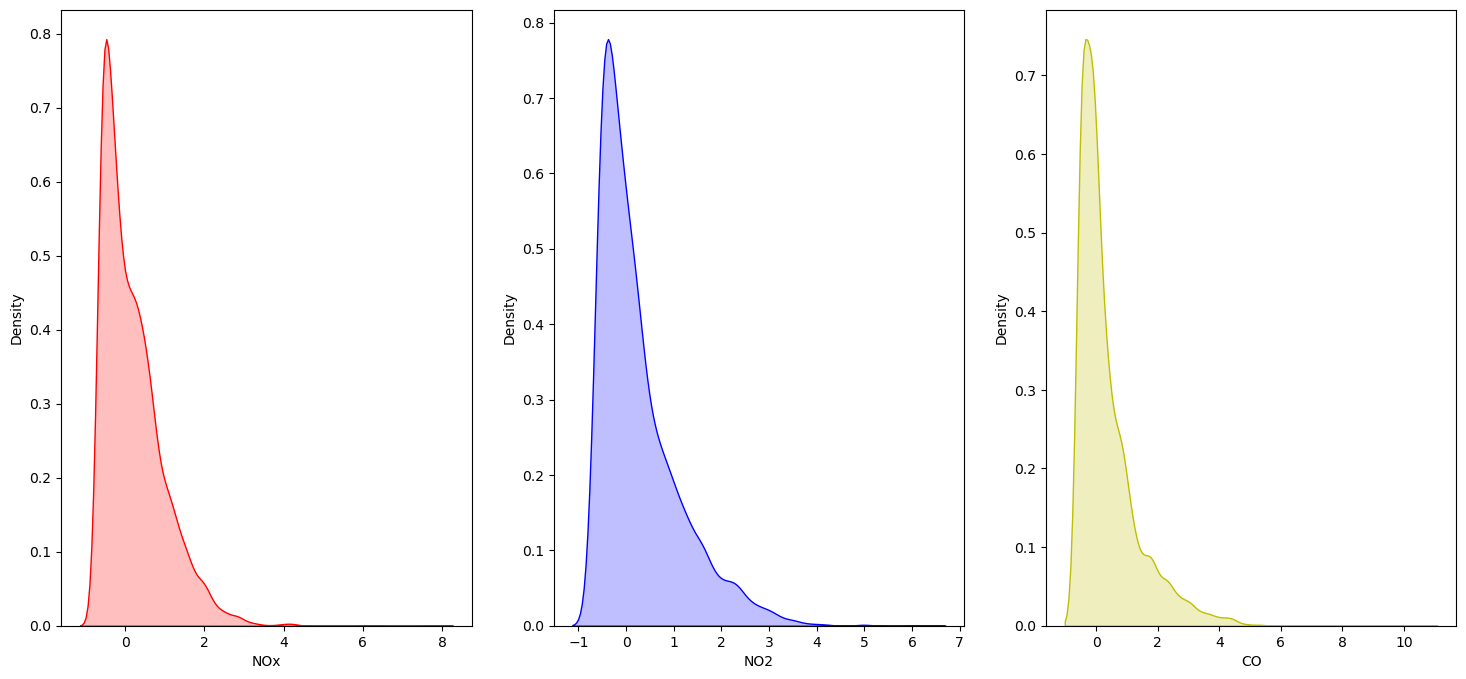

In [46]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))


sns.kdeplot(df_r['NOx'], color='r', fill=True, label='NOx', ax=ax[0])

sns.kdeplot(df_r['NO2'], color='b', fill=True, label='NO2', ax=ax[1])

sns.kdeplot(df_r['CO'], color='y', fill=True, label='CO', ax=ax[2])

#mumbai_stations_day['PM2.5'].plot(kind='kde', color='r', label='PM2.5')
#mumbai_stations_day['PM10'].plot(kind='kde', color='b', label='PM10')
#mumbai_stations_day['NOx'].plot(kind='kde', color='y', label='NOx')

<AxesSubplot:>

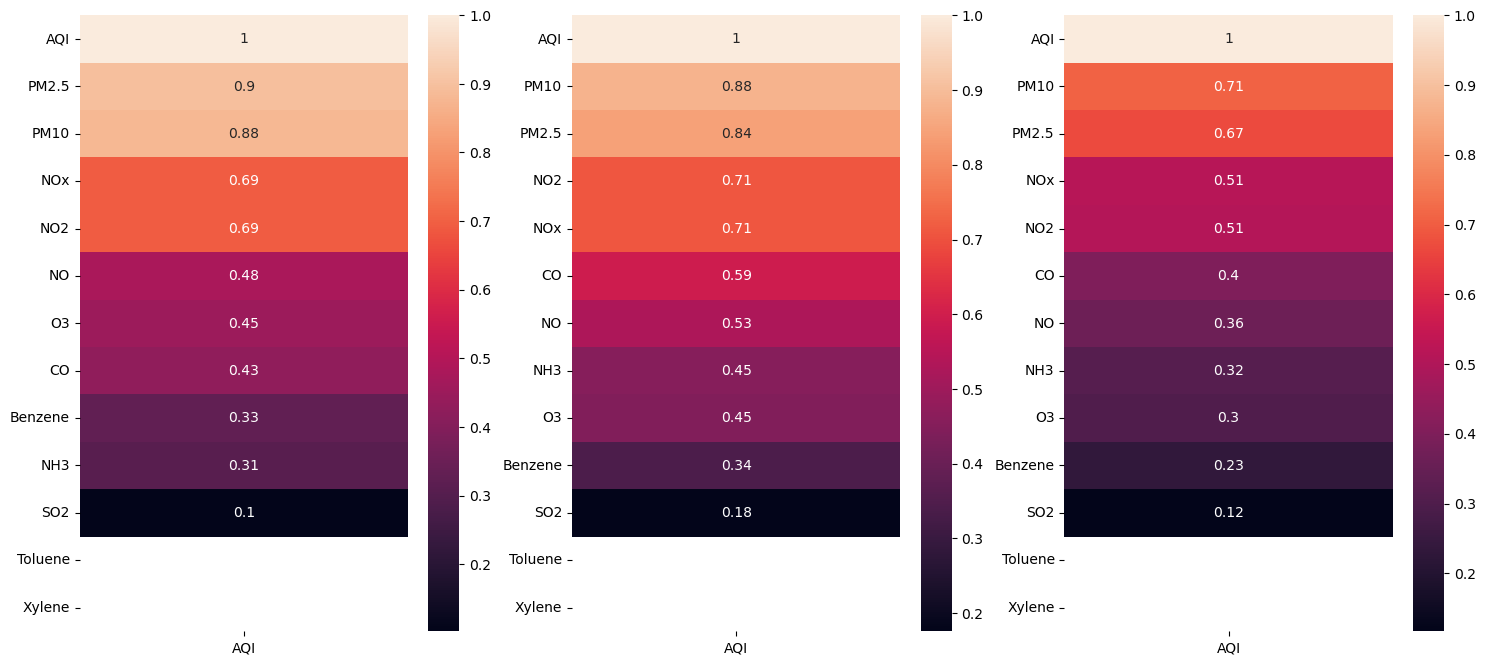

In [47]:
fig, ax = plt.subplots(1,3, figsize=(18, 8))
#ax.set(xlabel="", ylabel="")

corr1 = df_r.corr('pearson')[['AQI']].sort_values(by='AQI', ascending=False)
corr2 = df_r.corr('spearman')[['AQI']].sort_values(by='AQI', ascending=False)
corr3 = df_r.corr('kendall')[['AQI']].sort_values(by='AQI', ascending=False)


sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)